# Predicting variation in EUR/USD exchange rate

In [1]:
#set the working directory
import os
os.chdir("/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project/")

#check
os.getcwd()

'/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project'

In [151]:
import pandas as pd
import numpy as np
#load the data
df_merged = pd.read_csv("results/sentiment_ecb_pricing.csv.gz", compression="gzip")
df_merged

,date,eur_usd_rate,previous_eur_pricing,percent_change_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,...,quantile_0.25_60_days_moving_neg_sent,quantile_0.35_60_days_moving_neg_sent,quantile_0.50_60_days_moving_neg_sent,quantile_0.65_60_days_moving_neg_sent,quantile_0.75_60_days_moving_neg_sent,quantile_0.9_60_days_moving_neg_sent,mean_60_days_moving_neg_sent,sum_60_days_moving_neg_sent,count_60_days_moving_neg_sent,std_60_days_moving_neg_sent
0,2008-03-18,1.5771,1.5770,0.006341,1.56312,1.54807,1.485722,1.466678,1.564239,1.550083,...,-0.4019,0.000000e+00,0.0,0.0000,0.34000,0.45880,-0.044325,-17.2426,415,0.463341
1,2008-10-08,1.3731,1.3632,0.726232,1.37468,1.40807,1.477787,1.519566,1.379486,1.397029,...,-0.2732,-7.592000e-02,0.0,0.0772,0.32365,0.45880,0.001634,0.5049,324,0.388823
2,2008-10-10,1.3579,1.3682,-0.752814,1.36516,1.38728,1.470447,1.515859,1.369783,1.385626,...,-0.2732,-7.332801e-16,0.0,0.2263,0.34000,0.45880,-0.005758,-1.9922,361,0.394741
3,2008-10-13,1.3639,1.3579,0.441859,1.36526,1.38018,1.466748,1.514228,1.367822,1.381676,...,-0.2732,-5.160000e-02,0.0,0.2263,0.40190,0.45880,0.003252,1.1706,375,0.402306
4,2008-10-14,1.3752,1.3639,0.828506,1.36766,1.37467,1.463137,1.512665,1.370281,1.380498,...,-0.2732,-5.160000e-02,0.0,0.2263,0.36120,0.50559,-0.001590,-0.5882,384,0.402165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,2022-07-11,1.0098,1.0163,-0.639575,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,...,-0.3612,-1.027000e-01,0.0,0.2023,0.40190,0.68080,0.013286,448.0920,33727,0.486413
3513,2022-07-12,1.0042,1.0098,-0.554565,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,...,-0.3612,-1.027000e-01,0.0,0.2023,0.40190,0.68080,0.013405,455.4899,33979,0.485706
3514,2022-07-13,1.0067,1.0042,0.248954,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,...,-0.3612,-1.027000e-01,0.0,0.2023,0.40190,0.68080,0.013010,445.6989,34258,0.485461
3515,2022-07-14,1.0005,1.0067,-0.615874,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,...,-0.3612,-1.027000e-01,0.0,0.2023,0.40190,0.68080,0.011993,416.5805,34735,0.485770


In [146]:
#df_merged["percent_change_pricing"] = df_merged["eur_usd_rate"] - df_merged["previous_eur_pricing"]

Subset the dataframe with analysis data selecting only predictors

In [152]:
df_merged_modeling = df_merged.drop(["date", "eur_usd_rate", "percent_change_pricing", "previous_eur_pricing"], inplace=False, axis=1)
df_merged_modeling

,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing,quantile_0.1_neg_sent,quantile_0.25_neg_sent,...,quantile_0.25_60_days_moving_neg_sent,quantile_0.35_60_days_moving_neg_sent,quantile_0.50_60_days_moving_neg_sent,quantile_0.65_60_days_moving_neg_sent,quantile_0.75_60_days_moving_neg_sent,quantile_0.9_60_days_moving_neg_sent,mean_60_days_moving_neg_sent,sum_60_days_moving_neg_sent,count_60_days_moving_neg_sent,std_60_days_moving_neg_sent
0,1.56312,1.54807,1.485722,1.466678,1.564239,1.550083,1.493945,1.465873,0.44040,0.440400,...,-0.4019,0.000000e+00,0.0,0.0000,0.34000,0.45880,-0.044325,-17.2426,415,0.463341
1,1.37468,1.40807,1.477787,1.519566,1.379486,1.397029,1.463238,1.490667,-0.69122,-0.427775,...,-0.2732,-7.592000e-02,0.0,0.0772,0.32365,0.45880,0.001634,0.5049,324,0.388823
2,1.36516,1.38728,1.470447,1.515859,1.369783,1.385626,1.456771,1.486482,-0.49390,-0.261600,...,-0.2732,-7.332801e-16,0.0,0.2263,0.34000,0.45880,-0.005758,-1.9922,361,0.394741
3,1.36526,1.38018,1.466748,1.514228,1.367822,1.381676,1.453726,1.484455,-0.03052,0.401900,...,-0.2732,-5.160000e-02,0.0,0.2263,0.40190,0.45880,0.003252,1.1706,375,0.402306
4,1.36766,1.37467,1.463137,1.512665,1.370281,1.380498,1.451151,1.482650,0.00000,0.000000,...,-0.2732,-5.160000e-02,0.0,0.2263,0.36120,0.50559,-0.001590,-0.5882,384,0.402165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,1.057695,1.079113,-0.73806,-0.421500,...,-0.3612,-1.027000e-01,0.0,0.2023,0.40190,0.68080,0.013286,448.0920,33727,0.486413
3513,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,1.055941,1.077875,-0.75060,-0.340000,...,-0.3612,-1.027000e-01,0.0,0.2023,0.40190,0.68080,0.013405,455.4899,33979,0.485706
3514,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,1.054326,1.076699,-0.71605,-0.440400,...,-0.3612,-1.027000e-01,0.0,0.2023,0.40190,0.68080,0.013010,445.6989,34258,0.485461
3515,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,1.052562,1.075439,-0.62490,-0.361200,...,-0.3612,-1.027000e-01,0.0,0.2023,0.40190,0.68080,0.011993,416.5805,34735,0.485770


You can use the relative difference and other metrics of change of pricing.

In [159]:
y = df_merged["percent_change_pricing"].values
X = df_merged_modeling.values
print(y)
print(X)

[ 0.00634115  0.72623239 -0.75281392 ...  0.24895439 -0.61587365
  0.53973013]
[[ 1.56312000e+00  1.54807000e+00  1.48572167e+00 ...  1.01292000e+01
   2.30000000e+01  0.00000000e+00]
 [ 1.37468000e+00  1.40807000e+00  1.47778667e+00 ... -1.78750000e+00
   1.20000000e+01  3.91590195e-01]
 [ 1.36516000e+00  1.38728000e+00  1.47044667e+00 ...  7.56700000e-01
   5.90000000e+01  3.49092136e-01]
 ...
 [ 1.01100000e+00  1.02284000e+00  1.05300667e+00 ... -2.64999000e+01
   5.36000000e+02  4.99630541e-01]
 [ 1.00750000e+00  1.01902000e+00  1.05153667e+00 ...  3.93890000e+00
   6.74000000e+02  4.69538323e-01]
 [ 1.00542000e+00  1.01536000e+00  1.05027333e+00 ... -1.08190000e+01
   5.89000000e+02  4.83130499e-01]]


In [140]:
df_merged_modeling.columns

Index(['5_days_rolling_mean_pricing', '10_days_rolling_mean_pricing',
       '60_days_rolling_mean_pricing', '120_days_rolling_mean_pricing',
       '5_days_exp_rolling_mean_pricing', '10_days_exp_rolling_mean_pricing',
       '60_days_exp_rolling_mean_pricing', '120_days_exp_rolling_mean_pricing',
       'quantile_0.1_neg_sent', 'quantile_0.25_neg_sent',
       'quantile_0.35_neg_sent', 'quantile_0.50_neg_sent',
       'quantile_0.65_neg_sent', 'quantile_0.75_neg_sent',
       'quantile_0.9_neg_sent', 'mean_neg_sent', 'sum_neg_sent',
       'count_neg_sent', 'std_neg_sent',
       'quantile_0.1_10_days_moving_neg_sent',
       'quantile_0.25_10_days_moving_neg_sent',
       'quantile_0.35_10_days_moving_neg_sent',
       'quantile_0.50_10_days_moving_neg_sent',
       'quantile_0.65_10_days_moving_neg_sent',
       'quantile_0.75_10_days_moving_neg_sent',
       'quantile_0.9_10_days_moving_neg_sent', 'mean_10_days_moving_neg_sent',
       'sum_10_days_moving_neg_sent', 'count_10_days

In [160]:
predictors_null_model_array = df_merged_modeling.drop(df_merged_modeling.columns[["neg_sent" in column for column in df_merged_modeling.columns]], inplace=False, axis=1)
predictors_null_model_array

,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing
0,1.56312,1.54807,1.485722,1.466678,1.564239,1.550083,1.493945,1.465873
1,1.37468,1.40807,1.477787,1.519566,1.379486,1.397029,1.463238,1.490667
2,1.36516,1.38728,1.470447,1.515859,1.369783,1.385626,1.456771,1.486482
3,1.36526,1.38018,1.466748,1.514228,1.367822,1.381676,1.453726,1.484455
4,1.36766,1.37467,1.463137,1.512665,1.370281,1.380498,1.451151,1.482650
...,...,...,...,...,...,...,...,...
3512,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,1.057695,1.079113
3513,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,1.055941,1.077875
3514,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,1.054326,1.076699
3515,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,1.052562,1.075439


In [128]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

null_model_raw = RandomForestRegressor()
full_model_raw = RandomForestRegressor()
    #https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/

In [43]:
#se parameters of the model
null_model_raw.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [44]:
from sklearn import metrics

#see the metrics that can be used in GridSearch
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [161]:
from sklearn.model_selection import cross_val_score, KFold
np.median(cross_val_score(RandomForestRegressor(), X, y, cv=KFold(n_splits=5, shuffle=True), scoring="r2", n_jobs=5))

-0.061317505923476956

In [144]:
from sklearn.model_selection import cross_val_score, KFold
np.median(cross_val_score(RandomForestRegressor(), predictors_null_model_array, y, cv=KFold(n_splits=5, shuffle=True), scoring="r2", n_jobs=5))

-0.0013054536181713594

In [50]:
##use gridsearch to optimize the parameters of the model
#make imports
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ShuffleSplit

#make a dict with the parameters and values to be explored
    #https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
params={"max_depth" : [1,5,9,12, None]}

#shuffle
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.25)
    #CHECK IN MORE DETAIL
    #This seems to be equivalent to: 
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        #But, it is usable for GridSearchCV
       #https://stackoverflow.com/questions/57672955/how-to-use-gridsearchcv-for-tuning-parameters-with-train-test-split-strategy

#prepare the gridsearch with the pipe across these parameter values using 3 cores
search_1 = GridSearchCV(null_model_raw, params, n_jobs=8, cv=shuffle_split, scoring="r2")
search_2 = GridSearchCV(full_model_raw, params, n_jobs=8, cv=shuffle_split, scoring="r2")
#search = RandomizedSearchCV(pipe_att, params, n_iter=20, cv=shuffle_split, verbose=100, random_state=42, n_jobs=-2, scoring="r2")
    #we can use random search if we have many parameters, so the total number of combinations of all parameters
        #will be veery high
        #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    #for scoring options
        #sklearn.metrics.SCORERS.keys())
        
#make the search for out data
search_1.fit(X=predictors_null_model_array, y=y)
search_2.fit(X=X, y=y)

#print the best score and parameters
print("Best parameter null model (CV score=%0.3f):" % search_1.best_score_)
print(search_1.best_params_)
print("Best parameter full model (CV score=%0.3f):" % search_2.best_score_)
print(search_2.best_params_)

Best parameter null model (CV score=-0.010):
{'max_depth': 1}
Best parameter full model (CV score=-0.033):
{'max_depth': 1}


In [51]:
search_2.cv_results_

{'mean_fit_time': array([0.00373316, 0.02215257, 0.03968835, 0.05120478, 0.09939728]),
 'std_fit_time': array([0.00045606, 0.00309964, 0.00667938, 0.00870687, 0.00852956]),
 'mean_score_time': array([0.0004004 , 0.00065589, 0.0006197 , 0.00056987, 0.00058365]),
 'std_score_time': array([1.83136510e-05, 1.09052981e-04, 9.05298169e-05, 8.63381326e-05,
        4.45057948e-05]),
 'param_max_depth': masked_array(data=[1, 5, 9, 12, None],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 5},
  {'max_depth': 9},
  {'max_depth': 12},
  {'max_depth': None}],
 'split0_test_score': array([ 0.01018089, -0.08580723, -0.11134065, -0.19924042, -0.87378147]),
 'split1_test_score': array([-7.93685971e-04,  1.11217081e-03, -1.27706234e-01, -1.62106312e-01,
        -8.21244747e-01]),
 'split2_test_score': array([-0.01032557, -0.10365681, -0.21948695, -0.2551355 , -0.95199413]),
 'split3_test_score': ar

In [31]:
search_1.cv_results_

{'mean_fit_time': array([0.00555224, 0.01558256, 0.02354198, 0.03412061]),
 'std_fit_time': array([0.00282959, 0.00360359, 0.00395369, 0.00251137]),
 'mean_score_time': array([0.00274019, 0.00284014, 0.00276136, 0.00259447]),
 'std_score_time': array([0.0017632 , 0.0007883 , 0.00074838, 0.00049483]),
 'param_max_depth': masked_array(data=[1, 5, 9, 12],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 5},
  {'max_depth': 9},
  {'max_depth': 12}],
 'split0_test_score': array([-0.00418361, -0.05177928, -0.14338501, -0.15766793]),
 'split1_test_score': array([-0.0067251 , -0.12703939, -0.37346908, -0.3957472 ]),
 'split2_test_score': array([ 0.00280837, -0.03801351, -0.15683471, -0.21565211]),
 'split3_test_score': array([-0.02529472, -0.07463906, -0.11960675, -0.2077264 ]),
 'split4_test_score': array([-0.00455266, -0.03136631, -0.09527274, -0.26116896]),
 'mean_test_score': array([-0.0075895

For now we are not using the GridSearch, we will explore this in the future

Let's see the coefficients (importance of each predictor)

In [13]:
#print(ridge_model_1.feature_importances_)
#print(ridge_model_2.feature_importances_)

In [14]:
null_model = RandomForestRegressor(random_state=565735)
full_model = RandomForestRegressor(random_state=565735)

null_model.fit(X=predictors_null_model_array, y=y)
full_model.fit(X=X, y=y)

RandomForestRegressor(random_state=565735)

In [15]:
df_merged_modeling.columns

Index(['5_days_rolling_mean_pricing', '10_days_rolling_mean_pricing',
       '60_days_rolling_mean_pricing', '120_days_rolling_mean_pricing',
       '5_days_exp_rolling_mean_pricing', '10_days_exp_rolling_mean_pricing',
       '60_days_exp_rolling_mean_pricing', '120_days_exp_rolling_mean_pricing',
       'quantile_0.1_neg_sent', 'quantile_0.25_neg_sent',
       'quantile_0.35_neg_sent', 'quantile_0.50_neg_sent',
       'quantile_0.65_neg_sent', 'quantile_0.75_neg_sent',
       'quantile_0.9_neg_sent', 'mean_neg_sent', 'sum_neg_sent',
       'count_neg_sent'],
      dtype='object')

In [16]:
from sklearn import metrics

null_model_pred = null_model.predict(X=predictors_null_model_array)
full_model_pred = full_model.predict(X=X)

In [17]:
print("Null model: Mean absolute error:", metrics.mean_absolute_error(y, null_model_pred))
print("Null model: Mean squared error:", metrics.mean_squared_error(y, null_model_pred))
print("Null model: Root mean squared error:", metrics.mean_squared_error(y, null_model_pred, squared=False))
    #squared: If True returns MSE value, if False returns RMSE value.
print("Null model: R^2:", metrics.r2_score(y, null_model_pred))
    #0.83

Null model: Mean absolute error: 0.1709347014104581
Null model: Mean squared error: 0.05521883059598613
Null model: Root mean squared error: 0.23498687324186032
Null model: R^2: 0.8321029234861532


In [18]:
print("Full model: Mean absolute error:", metrics.mean_absolute_error(y, full_model_pred))
print("Full model: Mean squared error:", metrics.mean_squared_error(y, full_model_pred))
print("Full model: Root mean squared error:", metrics.mean_squared_error(y, full_model_pred, squared=False))
    #squared: If True returns MSE value, if False returns RMSE value.
print("Full model: R^2:", metrics.r2_score(y, full_model_pred))

Full model: Mean absolute error: 0.15964035715393884
Full model: Mean squared error: 0.0475979240131326
Full model: Root mean squared error: 0.2181694846057363
Full model: R^2: 0.8552748726534225


Let's calculate the different in R2 between the two models in percentage:

In [19]:
(metrics.r2_score(y, full_model_pred) - metrics.r2_score(y, null_model_pred))*100
    #1.79

2.317194916726928

<AxesSubplot:>

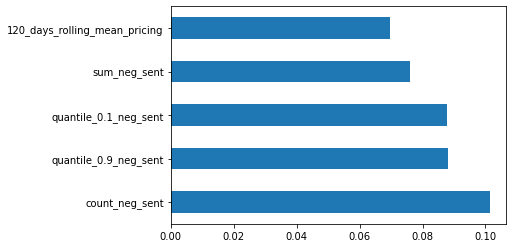

In [20]:
feat_importances = pd.Series(full_model.feature_importances_, index=df_merged_modeling.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [21]:
#open a plot with two panels
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

#plot scatter against date and eur pricing
ax1.scatter(x=null_model_pred, y=y, s=0.5)
ax2.scatter(x=full_model_pred, y=y, s=0.5)

#set titles and axes labels
ax1.title.set_text("Null model")
ax1.set_ylabel("Observed % change")
ax1.set_xlabel("Predicted % change")
ax2.title.set_text("Full model (Twitter augmented)")
ax2.set_ylabel("Observed % change")
ax2.set_xlabel("Predicted % change")

#add R2
ax1.text(0.17, 0.8, 'R2 = ' + str(np.round(metrics.r2_score(y, null_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(1.38, 0.8, 'R2 = ' + str(np.round(metrics.r2_score(y, full_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

#close
plt.show()

NameError: name 'plt' is not defined

### Next steps

- check moving averages
- Try to reach R2 of 0.9 modifying only twitter variables, so the model improving is only the twitter augumented
- Cross validation and parameter optimization
    - Compare RMSE between models in the evaluation datasets!!!
    - Avoid overfitting! You can sue many predictors, but use CV to avoid overftting!
- Include previous sentiment, this could be more useful for prediction? we do not need current sentiment...
    - Robert said to use the sentiment of the last week, month..
- Improve definition of the base model
- Try more models?
    - time series?
        - ARIMA considers shocks!
    - ensemble of random forest?
- Extend to other currencies?